![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [111]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

DR_NO  Date Rptd  ...  Status Desc                                  LOCATION
0  221412410 2022-06-15  ...  Invest Cont  13600    MARINA POINT                 DR
1  220314085 2022-07-22  ...  Invest Cont   2500 S  SYCAMORE                     AV
2  222013040 2022-08-06  ...  Invest Cont   3300    SAN MARINO                   ST
3  220614831 2022-08-18  ...  Invest Cont                         1900    TRANSIENT
4  231207725 2023-02-27  ...  Invest Cont   6200    4TH                          AV

[5 rows x 12 columns]

In [112]:
# check if there is any null values in dataframe
crimes.isnull().values.any()
# check total NaN values in the columns
crimes.isnull().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex         32248
Vict Descent     32249
Weapon Desc     167901
Status Desc          0
LOCATION             0
dtype: int64

In [113]:
# Start coding here
#Which hours has the highest frequency of crimes, store as peak_crime_hour
#extract the hours from the dataframe
hours = crimes['TIME OCC'].str[:2]
#store the data in new column HOUR OCC
crimes['HOUR OCC']= hours.astype(int)


# Count the frequency of crimes, value_count is to find for the specific column
crime_hour_df=crimes['HOUR OCC'].value_counts()

# Create a dataframe to store the data
crime_counts_df = crime_hour_df.reset_index()
crime_counts_df.columns = ['Hour', 'Crime_Count']

# sort values
crime_counts_df = crime_counts_df.sort_values(by='Hour', ascending=True)

#display the data
display(crime_counts_df)


Hour  Crime_Count
13     0        10696
17     1         7564
20     2         6352
21     3         5564
22     4         4696
23     5         4440
19     6         7008
18     7         7011
15     8         9600
16     9         9138
12    10        10720
10    11        11120
0     12        17065
11    13        11009
8     14        11889
6     15        12671
5     16        12676
2     17        14107
1     18        14447
4     19        13146
3     20        13325
7     21        12008
9     22        11697
14    23        10039

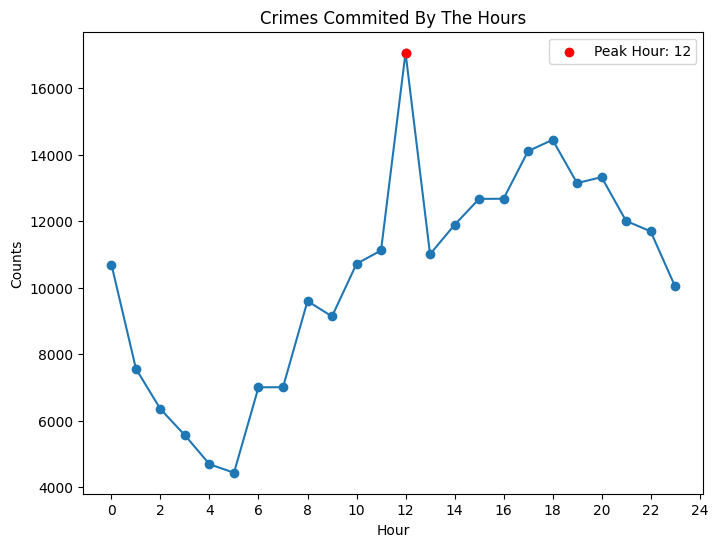

In [114]:
# plot a line graph
plt.figure(figsize=(8,6))
plt.plot(crime_counts_df['Hour'],crime_counts_df['Crime_Count'],marker='o',linestyle='-')

#labeling of graph
plt.title('Crimes Commited By The Hours')
plt.xlabel('Hour')
plt.ylabel('Counts')

# fine-tune graph
hours = np.arange(0,25,2)
plt.xticks(hours)

# Mark the highest frequency of crimes
peak_crime_hour = 12
peak_crime_count = crime_counts_df.loc[crime_counts_df['Hour'] == peak_crime_hour, 'Crime_Count'].values[0]
plt.scatter(peak_crime_hour, peak_crime_count, color='red', label=f'Peak Hour: {peak_crime_hour}', zorder=5)

#Display the plot
plt.legend()
plt.show()

#Highest frequency of crimes
peak_crime_hour = 12
 

In [115]:

# which area has the highest frequency of night crimes (10pm to 359am)
import pandas as pd
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
#extract the hours from the dataframe
hours = crimes['TIME OCC'].str[:2]
#store the data in new column HOUR OCC
crimes['HOUR OCC']= hours.astype(int)

#filter the HOUR OCC to be in range 10pm-3am
night_time = crimes[crimes['HOUR OCC'].isin([22,23,0,1,2,3])]

#group the data by 'AREA NAME', count no of occurencence per hour
area_group = night_time.groupby(['AREA NAME'])['HOUR OCC'].count()

#create a dataframe to store info
area_counts_df =area_group.reset_index()
area_counts_df.columns = ['AREA NAME', 'Crime_Count']

display(area_counts_df)


AREA NAME  Crime_Count
0   77th Street         3362
1       Central         4091
2    Devonshire         1900
3      Foothill         1707
4        Harbor         2128
5    Hollenbeck         1892
6     Hollywood         3299
7       Mission         1907
8   N Hollywood         2597
9        Newton         2927
10    Northeast         2342
11      Olympic         2851
12      Pacific         2773
13      Rampart         2480
14    Southeast         2884
15    Southwest         2787
16      Topanga         1743
17     Van Nuys         2029
18      West LA         1864
19  West Valley         2106
20     Wilshire         2243

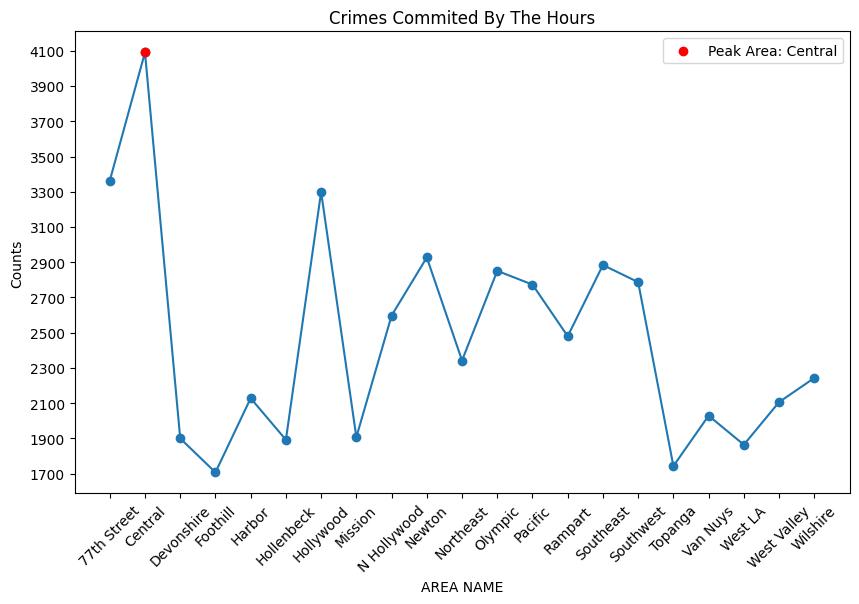

In [116]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np

#Plot a line graph
#figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(10,6))
plt.plot(area_counts_df['AREA NAME'],area_counts_df['Crime_Count'],marker='o',linestyle='-')

#Labeling of graph
plt.title('Crimes Commited By The Hours')
plt.xlabel('AREA NAME')
plt.ylabel('Counts')

#Fine-tune the grpah
counts = np.arange(1500,4500,200)
plt.yticks(counts)
plt.xticks(rotation = 45)

# Mark the highest frequency of crimes
peak_night_crime_location = 'Central'
peak_crime_count = area_counts_df.loc[area_counts_df['AREA NAME'] == peak_night_crime_location, 'Crime_Count'].values[0]
plt.scatter(peak_night_crime_location, peak_crime_count, color='red', label=f'Peak Area: {peak_night_crime_location}', zorder=5)

#Display the plot
plt.legend()  # Corrected the method name from plt.label() to plt.legend()
plt.show()

#Highest frequency of crimes
peak_night_crime_location = 'Central'

In [18]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
# create a list for bins (upper bound = infinity)
bins = [0,17,25,34,44,54,64,np.inf]
# create a list for label
group_label = ['<18','18-25','26-34','35-44','45-54','55-64','65+']
# using pd.cut 
crimes['group']=pd.cut(crimes['Vict Age'], bins=bins, labels = group_label)

# Value_counts() categorizes the types of categories in that columns and tells the count for each and every category 
# Count() is what tells us the total number of rows or you can say datapoints for that column
victim_ages = crimes['group'].value_counts().sort_index()


# create dataseries victim_ages
# syntax dataseries= pd.Series(data=data, index=index, name='')
#data: Refers to the data values that will be contained within the Series.
#index: Represents the index labels of the Series.
#name: Sets the name for the Series. This parameter is optional. If provided, it labels the Series itself.

print(age_group_df)



  Age_Group  Count_Crimes
0       <18          4528
1     18-25         28291
2     26-34         47470
3     35-44         42157
4     45-54         28353
5     55-64         20169
6       65+         14747


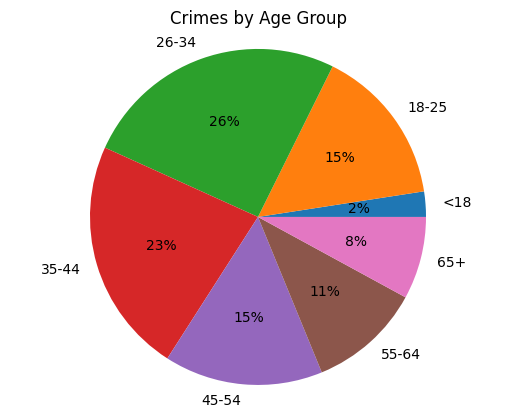

In [17]:
# Plot a histogram to display information

# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# DataFrame
# store and reset index of dataframe
age_group_df= victim_ages.reset_index().sort_index()
age_group_df.columns = ['Age_Group',"Count_Crimes"]

# Plot pie chart
plt.pie(age_group_df['Count_Crimes'], labels=age_group_df['Age_Group'], autopct='%.0f%%')
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
# Title for the pie chart
plt.title('Crimes by Age Group')  
plt.show()

